# Исследование данных о российском кинопрокате

## Изучение данных

### Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на тип данных столбца, по которому будем соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Импортируем необходимые для исследования библиотеки:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline
pd.set_option('display.float_format', '{:,.2f}'.format)

Создадим датафреймы из данных: `df_movies` для данных о прокатных удостоверениях и `df_shows` для данных о прокате в российских кинотеатрах 

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Посмотрим на подробную информацию, применив метод `info()` к каждому.

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [4]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Нужно объединить обе таблицы в одну. Объединять будем по общему столбцу `puNumber`. Для слияния необходимо, чтобы тип данных этого столбца был одинаковым в обеих таблицах. Для начала проверим тип данных в каждой.

In [5]:
df_movies['puNumber'].dtypes, \
df_shows['puNumber'].dtypes

(dtype('O'), dtype('int64'))

Видим, что типы данных отличаются: в таблице `df_movies` - объект, который является строкой, а в `df_shows` - целое число. Посмотрим на строки:

In [6]:
df_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', 'нет'], dtype=object)

Видим, что все номера в виде строк, но есть значения "нет". Посмотрим на них подробнее:

In [7]:
df_movies[df_movies['puNumber'] == 'нет']['puNumber']

1797    нет
Name: puNumber, dtype: object

Видим, что в таблице только 1 строка, в столбце `puNumber` которой есть значение "нет". Заменим его на пропуск с помощью `to_numeric` и `errors='coerce'`.

In [8]:
df_movies.loc[1797, 'puNumber'] = pd.to_numeric(df_movies.loc[1797, 'puNumber'], errors='coerce')

In [9]:
df_movies.loc[1797, 'puNumber']

nan

In [10]:
# проверка
df_movies['puNumber'].sort_values().unique()

array([' 111004112', '111000110', '111000111', ..., '231001012',
       '231001111', nan], dtype=object)

Так как пропуск NaN нельзя перевести в целое число, то приведем столбец в обеих таблицах к типу данных `float64`.

In [11]:
df_movies['puNumber'] = df_movies['puNumber'].astype('float64')
df_shows['puNumber'] = df_shows['puNumber'].astype('float64')

In [12]:
# проверка
df_movies['puNumber'].dtypes, \
df_shows['puNumber'].dtypes

(dtype('float64'), dtype('float64'))

После проверки видно, что типы данных теперь совпадают. Можем приступить к объединению таблиц.

In [13]:
df = df_movies.merge(df_shows, on='puNumber', how='left')

Теперь рассмотрим получившийся датафрейм более детально:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null float64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(5), object(11)
memory usage: 994.2+ KB


In [15]:
df.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,"7,485.00",332.00,332.00,332.00,"3,158.00"
mean,"135,196,587.56","11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"38,352,919.34","24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,"1,811,096.00",0.00,0.00,0.00,0.00
25%,"112,025,118.00",0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,"121,015,510.00",0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"124,003,314.00","15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


In [16]:
df.columns

Index(['title', 'puNumber', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

### Вывод

По итогу мы открыли оба файла с данными и через общий столбец `puNumber` объединили в один датафрейм.

В таблице 16 столбцов. Типы данных:
- `float64` - 5 столбцов;
- `object` - 11 столбцов.

Согласно документации к данным:
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.

- `title` - название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

Столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

В названиях колонок поменяем `puNumber` на `pu_number`.

Количество значений в столбцах отличается, значит имеются пропуски.

Так же нужно будет проверить столбец `ratings`, потому что его тип данных - строковый, а рейтинг лучше в вещественном типе данных.

Предварительно, данных для исследования хватает. Однако сначала нужно устранить пропуски и типы данных.

### Предобработка данных

Для начала заменим название колонки `puNumber` на `pu_number`:

In [17]:
df = df.rename(columns={'puNumber' : 'pu_number'})

In [18]:
# проверка
df.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

#### Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем.

In [19]:
df.dtypes

title                     object
pu_number                float64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Переведем тип данных столбца `show_start_date` в `datetime`.

In [20]:
df['show_start_date'] = pd.to_datetime(df['show_start_date']).dt.date

In [21]:
# проверка
df['show_start_date'].head()

0    2015-11-27
1    2016-09-13
2    2016-10-10
3    2016-06-10
4    2015-07-29
Name: show_start_date, dtype: object

Так же нужно изменить тип данных `pu_number` и `ratings`, но сначала необходимо проанализировать пропуски.

#### Изучим пропуски в датафрейме

In [22]:
df.isna().sum()

title                       0
pu_number                   1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

#####  `pu_number`

В этом столбце только одно пропущенное значение. Посмотрим на строку подробнее.

In [23]:
df[df['pu_number'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),nan,2014-05-15,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan


Половина данных этой строки с пропусками, в том числе и в рассматриваемом столбце. Удалим эту неинформативную строку.

In [24]:
df.dropna(subset=['pu_number'], inplace=True)

In [25]:
# проверка
df['pu_number'].isna().sum()

0

Теперь можно перевести в тип данных `int64`.

In [26]:
df['pu_number'] = df['pu_number'].astype('int64')

In [27]:
# проверка
df['pu_number'].dtypes

dtype('int64')

#####  `film_studio`

In [28]:
df['film_studio'].isna().sum()

18

In [29]:
df[df['film_studio'].isna()]['production_country'].value_counts()

Россия                 16
США, Великобритания     1
Name: production_country, dtype: int64

Большая часть пропусков - студии России. При этом пропуски составляют 0.23%, поэтому строки с пропусками можно убрать.

In [30]:
df.dropna(subset=['film_studio'], inplace=True)

In [31]:
# проверка
df['film_studio'].isna().sum()

0

#####  `production_country`

In [32]:
df['production_country'].isna().sum()

1

В этом столбце тоже только одно пропущенное значение. Удалим.

In [33]:
df.dropna(subset=['production_country'], inplace=True)

In [34]:
# проверка
df['production_country'].isna().sum()

0

#####  `director`

In [35]:
df['director'].isna().sum()

8

In [36]:
df[(df['director'].isna())].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,nan
3840,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,nan
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan


Примечательно, что все пропуски в этой колонке относятся к теартам, оркестрам, концертам, музеям и тп. К фильмам отношения не имеют, поэтому можем убрать.

In [37]:
df.dropna(subset=['director'], inplace=True)

In [38]:
# проверка
df['director'].isna().sum()

0

#####  `producer`

In [39]:
df['producer'].isna().sum()

564

In [40]:
df[df['film_studio'] == 'Киностудия "Мосфильм"']['producer'].unique()

array([nan, 'ФГУП "Киноконцерн "Мосфильм"'], dtype=object)

In [41]:
df[df['film_studio'] == 'Киностудия "Мосфильм"']['production_country'].unique()

array(['СССР', 'СССР  ', 'СССР ', ' СССР ', 'СССР   ', ' СССР   ',
       'СССР     ', 'СССР    ', ' СССР'], dtype=object)

Практически все пропуски от киностудии Мосфильм и все от СССР. При этом видим, что уникальные значения одного и того же "СССР" отличаются наличием пробелов. Сразу же исправим этот момент - воспользуемся `str.strip`.

In [42]:
df['production_country'] = df['production_country'].str.strip()

In [43]:
df[df['film_studio'] == 'Киностудия "Мосфильм"']['production_country'].unique()

array(['СССР'], dtype=object)

Возможно, режиссер и продюсер в случае СССР это один и тот же человек. Пока оставим пропуски, как есть.

#####  `refundable_support`

In [44]:
df['refundable_support'].isna().sum()

7126

In [45]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  564
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   947
genres                    956
box_office               4303
dtype: int64

Видим, что пропусков очень много и их количество совпадает по 4м столбцам: `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`. Нужно исследовать дополнительно. Пока оставим.

#####  `nonrefundable_support`

Ситуация аналогична пункту **1.3.2.6**.

#####  `budget`

Ситуация аналогична пункту **1.3.2.6**.

#####  `financing_source`

Ситуация аналогична пункту **1.3.2.6**.

#####  `ratings`

Пропусков в столбце 947. При этом тип данных столбца - `object`. Проверим на уникальные значения.

In [46]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [47]:
# функция нахождения количества значений с "%"
def catch_a_proc(rate):
    proc_count = 0
    if '%' in rate:
        proc_count += 1
    return proc_count

Видим, что среди значений столбца присутствует процентный рейтинг, что приводит к строковому типу весь столбец.
Рейтинг из Кинопоиска не содержит проценты, поэтому проценты точно не оттуда. Посмотрим, сколько таких значений.

In [48]:
df['ratings'].str.find('%').value_counts()

-1.00    6482
2.00       29
Name: ratings, dtype: int64

Видим, что таких данных всего 29, что составляет 0.4% от всей длины столбца. Можем удалить.

In [49]:
df = df.drop(df[df['ratings'].str.find('%') == 2].index)

In [50]:
# проверка
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '3.7', '1.4', '3.1', '3.5', '3.2',
       '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', '1.0',
       '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '8.9', '9.1'],
      dtype=object)

Удаление прошло успешно. Можно сразу поправить тип данны столбца.

In [51]:
df['ratings'].astype('float64')

0      7.20
1      6.60
2      6.80
3      6.80
4      6.80
       ... 
7481    nan
7482   5.40
7483    nan
7484    nan
7485   6.30
Name: ratings, Length: 7429, dtype: float64

Теперь тип данных соответствует рейтингу.
Пропусков около 12%. Возможно эти фильмы не входят в рейтинг Кинопоиска, либо у них низкий рейтинг, близкий к нулю. Так же возможен вариант незаполнения или потери данных. Пока оставим.

#####  `genres`

In [52]:
df['genres'].isna().sum()

953

Пропусков 953. Тип данных - `object`. Посмотрим на пропуски подробнее.

In [53]:
df[df['genres'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,NaN,NaN,nan
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,NaN,NaN,nan
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,nan
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,nan,nan,nan,NaN,NaN,NaN,nan
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,nan
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,nan,nan,nan,NaN,NaN,NaN,nan


Жанр фильма мог быть не указан, либо данные утеряны. Пока оставим.

#####  `box_office`

In [54]:
df['box_office'].isna().sum()

4289

Больше половины пропусков. Образовались, скорее всего, в результате слияния двух датафреймов. Пока оставим.

#### Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты.

In [55]:
df.duplicated().sum()

0

На данный момент полных дубликатов нет. Возможно они появятся после изучения и, если потребуется, правки категориальных значений.

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

К категориальным можно отнести `type`, `production_country`, `age_restriction`. Во всех, кроме `type` присутствую комбинации помимо основных категорий. Например страна-производитель может быть одна, а может быть и гораздо больше. В таком случае трудно определить, к какой категории лучше отнести комбинацию стран.

Посмотрим на значения `type`.

In [56]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В данных этого столбца присутствую значения с пробелами. Избавимся от них уже знакомым нам способом `str.strip()`.

In [57]:
df['type'] = df['type'].str.strip()

In [58]:
# проверка
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Проверим количественные значения

- Проверим, есть ли в таких столбцах подозрительные данные.

В описании столбца `budget` указано, что он содержит в себе государственную поддержку. Проверим это.

In [59]:
df.query('(refundable_support + nonrefundable_support) > budget')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.6,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.2,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.3,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.1,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.3,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.3,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.6,фантастика,"1,038,321,489.00"


Видим, что есть 17 строк, в которых бюджет равен нулю, причем государственная поддержка и сборы фильмов присутствуют. Бюджет, как минимум, должен содержать в себе сумму государственной поддержки. Поэтому удалим эти строки в силу того, что их мало.

In [60]:
df = df.drop(df.query('(refundable_support + nonrefundable_support) > budget').index)

In [61]:
# проверка
len(df.query('(refundable_support + nonrefundable_support) > budget'))

0

Немного скорректировали данные по бюджету. Теперь посмотрим на количественные характеристики.

In [62]:
df.describe(include=['int', 'float'])

,pu_number,refundable_support,nonrefundable_support,budget,box_office
count,"7,412.00",313.00,313.00,313.00,"3,123.00"
mean,"135,317,830.31","11,677,316.29","48,367,472.35","134,778,924.84","76,274,469.73"
std,"38,418,483.63","25,214,706.40","59,988,148.18","191,643,121.41","240,741,348.54"
min,"1,811,096.00",0.00,0.00,"15,010,000.00",0.00
25%,"113,000,693.25",0.00,"25,000,000.00","46,154,000.00","85,671.50"
50%,"121,015,710.50",0.00,"30,000,000.00","74,071,918.00","2,330,104.00"
75%,"124,003,318.25","10,000,000.00","40,000,000.00","150,008,573.00","23,667,864.95"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


#####  `pu_number`

Этот столбец хоть и состоит из числового значения, но к количественным его нельзя отнести. Однако небольшие изменения здесь нужно внести - приведем к типу данных `int64`.

In [63]:
df['pu_number'] = df['pu_number'].astype('int64')

In [64]:
# проверка
df['pu_number'].dtypes

dtype('int64')

#####  `refundable_support`

Очень странно, что `Q1` и медиана равны минимальному значению, то есть нулю. Посмотрим, есть ли выбросы с помощью `boxplot`.

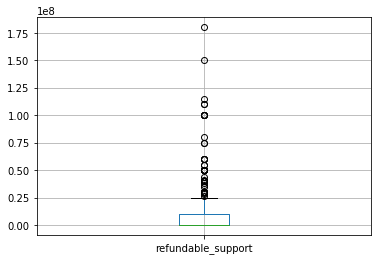

In [65]:
df.boxplot(column=('refundable_support'));

Напишем функцию для опеределения верхнего и нижнего порогов нормальных значений.

In [66]:
def remove_outlier(col):
    # определим значение IQR через Q1 и Q3
    # найдем верхнюю и нижнюю границы
    Q1,Q3 = col.quantile([.25, .75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [67]:
low_refund, up_refund = remove_outlier(df['refundable_support'])

Выберем те, которые ниже вернего порога и выше нижнего.

In [68]:
df[(df['refundable_support'] <= up_refund) & (df['refundable_support'] >= low_refund)]['refundable_support'].count()

264

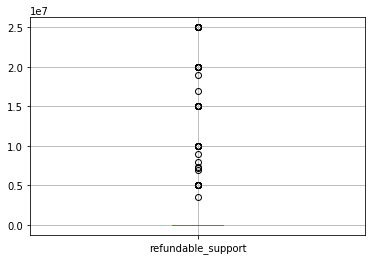

In [69]:
df[(df['refundable_support'] <= up_refund) & (df['refundable_support'] >= low_refund)].boxplot(column='refundable_support');

Выборка будет состоять из 290 значений. Остальное не входит в границы.

#####  `nonrefundable_support`

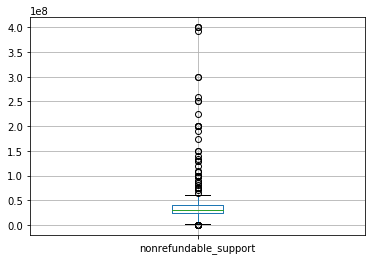

In [70]:
df.boxplot(column=('nonrefundable_support'));

Теперь найдем границы.

In [71]:
low_nonrefund, up_nonrefund = remove_outlier(df['nonrefundable_support'])

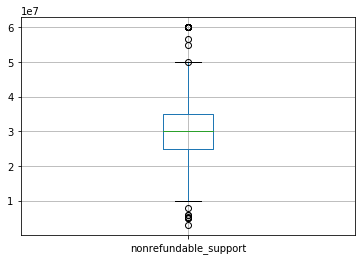

In [72]:
df[(df['nonrefundable_support'] <= up_nonrefund) & (df['nonrefundable_support'] >= low_nonrefund)].boxplot(column=('nonrefundable_support'));

#####  `budget`

Аналогично пункту **1.3.5.3**

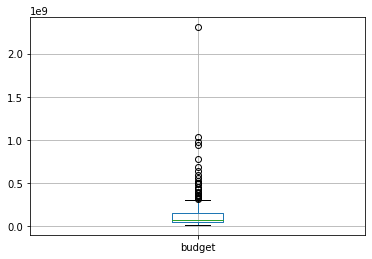

In [73]:
df.boxplot(column=('budget'));

In [74]:
low_budget, up_budget = remove_outlier(df['budget'])

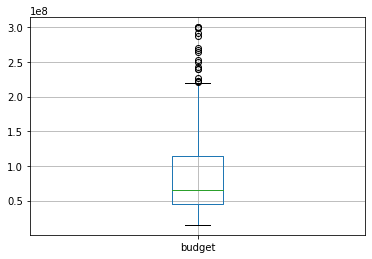

In [75]:
df[(df['budget'] <= up_budget) & (df['budget'] >= low_budget)].boxplot(column=('budget'));

#####  `box_office`

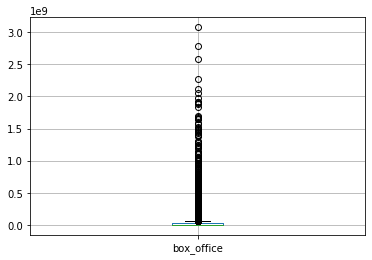

In [76]:
df.boxplot(column=('box_office'));

In [77]:
low_office, up_office = remove_outlier(df['box_office'])

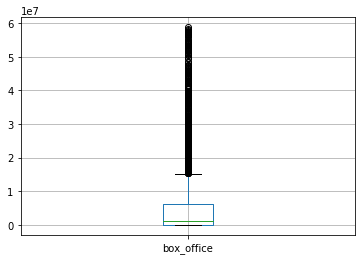

In [78]:
df[(df['box_office'] <= up_office) & (df['box_office'] >= low_office)].boxplot(column=('box_office'));

#### Добавим новые столбцы

##### Столбец с информацией о годе выпуска фильма в прокат.

Напишем функцию, возвращающую год выпуска фильма.

In [79]:
def take_start_year(date):
    return date.year

Создадим новый столбец, применив фукцию к столбцу `show_date_time` методом `apply`.

In [80]:
df['start_year'] = df['show_start_date'].apply(take_start_year)

In [81]:
# проверка
df['start_year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: start_year, dtype: int64

##### Столбцы с именем и фамилией главного режиссёра и основным жанром фильма.

Сначала создадим столбец с именем и фамилией главного режиссёра из столбца `director`. Посмотрим, как выглядит столбец.

In [82]:
df['director'].sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

Присутствуют лишние пробелы. Избавимся от них методом `str.strip()`.

In [83]:
df['director'] = df['director'].str.strip()

Так же в столбце встречаются несколько режиссёров. В качестве главного выберем первого в списке, то есть с индексом "0". Для этого напишем функцию.

In [84]:
def choice_main_director(director):
    # функция делит строку по запятой и возвращает первого в списке режиссёра
    return director.split(',')[0]

Применим функцию к столбцу `director` с помощью `apply`.

In [85]:
df['main_director'] = df['director'].apply(choice_main_director)

In [86]:
# проверка
df['main_director'].sort_values(ascending=False)

724                     хореография Фредерика Эштона
2731                    хореография Фредерика Аштона
1554    хореография Пьера Лакотта по Филиппу Тальони
1318                        хореография Питера Райта
765                         хореография Питера Райта
                            ...                     
5411                                     А. Калюжный
5482                                    А Андрющенко
3561                                       Ён Сан-хо
2656                                   Ёлкин Туйчиев
2657                                   Ёлкин Туйчиев
Name: main_director, Length: 7412, dtype: object

Теперь создадим столбец с основным жанром из столбца `genres`. Посмотрим, как выглядит столбец.

In [87]:
df['genres'].sort_values().unique()

array(['аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', 'боевик,драм

Видим, что чаще всего встречаются сразу несколько жанров. По аналогии с главным режиссёром, выберем в качестве основного жанра первый из списка в каждой строке. При этом необходимо учесть тот факт, что в столбце есть пропуски `nan`.

Напишем функцию, которая будет проверять на наличие пропуска и возвращать пропуск в строке, если он был в исходном столбце `genres`, либо возвращать первый жанр из списка, то есть с индексом "0".

In [88]:
def choice_main_genre(genre):
    if genre != genre: # проверка на пропуск
        return np.nan # возврат пропуска
    else:
        return genre.split(',')[0] # иначе возврат первого жанра в списке

In [89]:
df['main_genre'] = df['genres'].apply(choice_main_genre)

In [90]:
# проверка
df['main_genre'].sort_values().unique()

array(['аниме', 'биография', 'боевик', 'вестерн', 'военный', 'детектив',
       'детский', 'для взрослых', 'документальный', 'драма', 'история',
       'комедия', 'концерт', 'короткометражка', 'криминал', 'мелодрама',
       'музыка', 'мультфильм', 'мюзикл', 'приключения', 'реальное ТВ',
       'семейный', 'спорт', 'триллер', 'ужасы', 'фантастика',
       'фильм-нуар', 'фэнтези', nan], dtype=object)

##### Столбец с долей государственной поддержки от общего бюджета.

Мы помним, что столбцы `refundable_support`, `nonrefundable_support` и `budget` имеют большой количество пропусков, причем их количество одинаково для каждого из указанных столбцов и равно `7099`. Необходимо учесть это при вычислении доли гос. поддержки.

Для начала проверим, какое количество пропусков совпадает по всем трём столбцам.

In [91]:
df[(df['refundable_support'].isna()) | (df['nonrefundable_support'].isna()) | (df['budget'].isna())].describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office,start_year
count,"7,099.00",0.00,0.00,0.00,"2,824.00","7,099.00"
mean,"136,364,808.54",nan,nan,nan,"70,420,017.53","2,014.49"
std,"38,904,929.40",nan,nan,nan,"226,985,653.72",3.02
min,"1,811,096.00",nan,nan,nan,0.00,"2,010.00"
25%,"114,003,867.00",nan,nan,nan,"52,363.25","2,012.00"
50%,"121,017,312.00",nan,nan,nan,"2,011,357.75","2,014.00"
75%,"124,004,516.50",nan,nan,nan,"19,189,636.07","2,017.00"
max,"231,001,111.00",nan,nan,nan,"2,576,613,776.83","2,019.00"


Видим, что все `7099` пропусков совпадают по нужным столбцам. Тогда напишем функцию, которая, с учетом пропусков, будет считать долю гос. поддержки.

In [92]:
def share_of_budget(row):
    refund = row['refundable_support']
    nonrefund = row['nonrefundable_support']
    budget = row['budget']
    
    if refund != refund: # проверка на пропуск
        return np.nan # возврат пропуска в случае пропуска
    else:
        return (refund + nonrefund) / budget # возврат доли

In [93]:
df['share_of_budget'] = df.apply(share_of_budget, axis=1)

In [94]:
# проверка
df[df['share_of_budget'].notna()]['share_of_budget'].head()

1281   0.33
1448   0.70
1498   0.61
1524   0.69
1792   0.62
Name: share_of_budget, dtype: float64

По итогу этого шага мы получили 4 дополнительных столбца: `start_year`, `main_director`, `main_genre`, `share_of_budget`.

#### Вывод

По итогу блока Предобработки данных мы:
- проверили и поправили типы данных;
- изучили пропуски, внесли коррективы, удалили ненужные, оставили необходимые без изменений;
- после корректировок проверили строки на полные дубликаты;
- рассмотрели категориальные и количественные значения, внесли правки;
- добавили 4 новых столбца для удобства анализа;

### Проведём исследовательский анализ данных

- Посмотрим, сколько фильмов выходило в прокат каждый год. Будем учитывать тот факт, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Судя по пункту **1.3.2.1** данные таковы, что среди номеров прокатных удостоверений пропусков нет. Поэтому доля фильмов с указанной информацией будет 100%.

Объединим `start_year` и прокатные удостоверения `pu_number` в сводную таблицу.

In [95]:
df_film_in_year = df.groupby('start_year')['pu_number'].count()
df_film_in_year

start_year
2010    979
2011    619
2012    590
2013    628
2014    803
2015    691
2016    809
2017    501
2018    872
2019    920
Name: pu_number, dtype: int64

- Проверим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

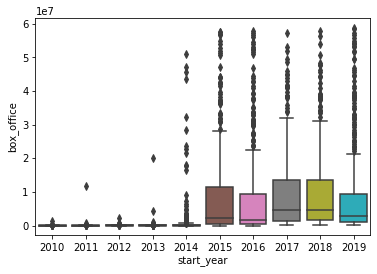

In [96]:
sns.boxplot(x='start_year', y='box_office', data=df[(df['box_office'] <= up_office) & (df['box_office'] >= low_office)]);

In [97]:
df_year_sumbox = df[(df['box_office'] <= up_office) & (df['box_office'] >= low_office)].groupby('start_year')['box_office'].sum()
df_year_sumbox

start_year
2010       2,428,654.00
2011      14,102,765.00
2012       6,909,333.00
2013      29,799,706.20
2014     469,998,813.90
2015   3,130,887,923.92
2016   3,269,301,207.02
2017   2,676,759,795.59
2018   3,371,534,528.71
2019   3,781,265,628.42
Name: box_office, dtype: float64

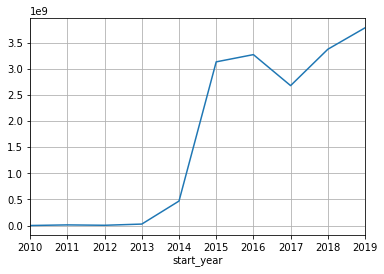

In [98]:
ax = df_year_sumbox.plot(
    grid=True
);

ax.set_title=('График динамики проката по годам');
ax.set_xlabel=('Старт проката фильмов, годы');
ax.set_ylabel=('Цена проката фильмов, руб');

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [99]:
df_mean_median_box = df[(df['box_office'] <= up_office) & (df['box_office'] >= low_office)].pivot_table(index='start_year',
                                                                                   values='box_office',
                                                                                   aggfunc=['mean', 'median'])

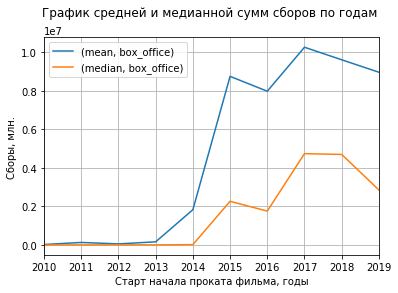

In [100]:
ax = df_mean_median_box.plot(
    grid=True
);

ax.set_title('График средней и медианной сумм сборов по годам \n');
ax.legend()
ax.set_xlabel('Старт начала проката фильма, годы');
ax.set_ylabel('Сборы, млн.');

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Для начала проверим значения столбца `age_restriction`.

In [101]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Видим, что строки очень длинные. Вполне хватит строки типа `«0+»`. Выделим эти части и заменим в исходном столбце.

In [102]:
df['age_restriction'] = df['age_restriction'].apply(lambda age: age.split(' ')[0])
df['age_restriction'].head()

0    «18+»
1     «6+»
2    «18+»
3    «18+»
4    «18+»
Name: age_restriction, dtype: object

Теперь посмотрим, как возрастное ограничение влияет на сборы.

In [103]:
df_age_box = df.query('start_year >= 2015').groupby('age_restriction')['box_office'].sum()

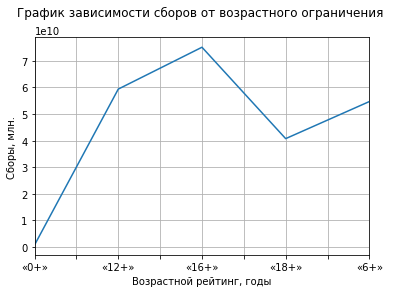

In [104]:
ax = df_age_box.plot(
    grid=True
);

ax.set_title('График зависимости сборов от возрастного ограничения \n');
ax.set_xlabel('Возрастной рейтинг, годы');
ax.set_ylabel('Сборы, млн.');

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


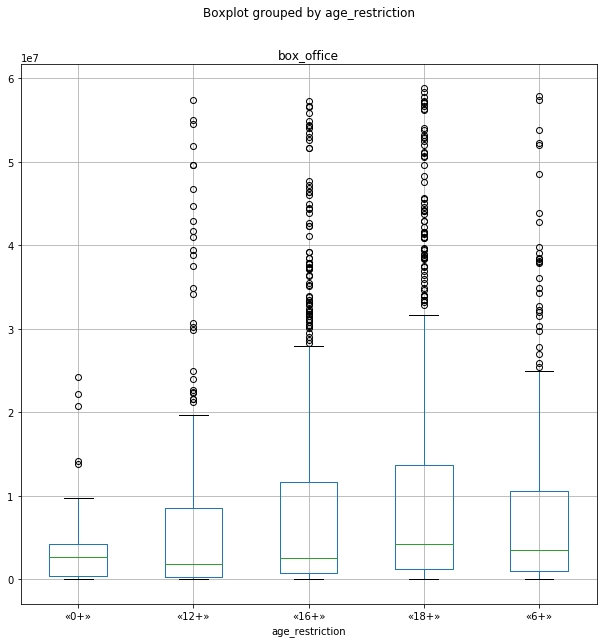

In [105]:
df[(df['box_office'] <= up_office) & (df['box_office'] >= low_office)] \
    .query('start_year >= 2015') \
    .boxplot(column='box_office',by='age_restriction',figsize=(10, 10));

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


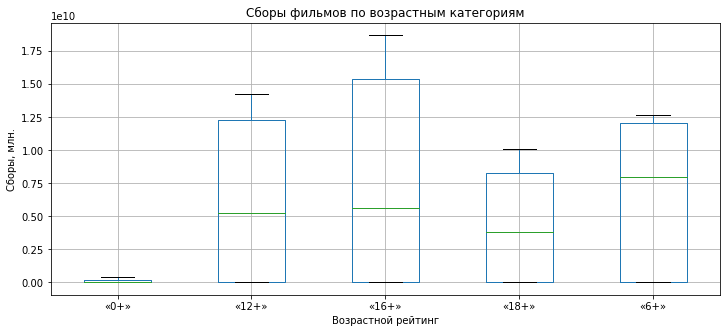

In [106]:
ax = (df.sort_values(by='box_office')
     .pivot_table(index='start_year', columns='age_restriction', aggfunc={'box_office':sum})
     .plot.box( y='box_office', figsize=(12, 5), grid=True)
);


ax.set_title('Сборы фильмов по возрастным категориям');
ax.set_xlabel('Возрастной рейтинг');
ax.set_ylabel('Сборы, млн.');

Видим, что чем сильнее ограничение по возрасту, тем выше верхний уровень сборов с проката.

Для оценки влияния года выпуска в прокат на взаимосвязь ограничения по возрасту со сборами с проката добавим в исходную таблицу столбец `age`, в котором:
- 0 это «0+»
- 1 это «6+»
- 2 это «12+»
- 3 это «16+»
- 4 это «18+»

In [107]:
d = {'«0+»': 0, '«6+»': 1, '«12+»': 2, '«16+»': 3, '«18+»': 4}
df['age'] = df['age_restriction'].map(d)
df['age'].head()

0    4
1    1
2    4
3    4
4    4
Name: age, dtype: int64

In [108]:
df_year_age_office = df[(df['box_office'] <= up_office) & (df['box_office'] >= low_office)] \
    .query('start_year >= 2015') \
    .pivot_table(index='start_year', values=['age', 'box_office'], aggfunc={'age': 'median', 'box_office': 'sum'})
df_year_age_office.reset_index().sort_values(by='age')

,start_year,age,box_office
0,2015,3,"3,130,887,923.92"
1,2016,3,"3,269,301,207.02"
2,2017,3,"2,676,759,795.59"
3,2018,3,"3,371,534,528.71"
4,2019,3,"3,781,265,628.42"


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 3.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 3.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 3.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


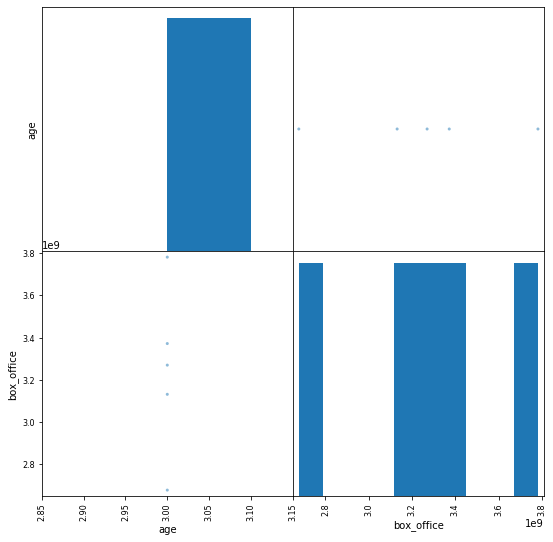

In [109]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(df_year_age_office, figsize=(9, 9));

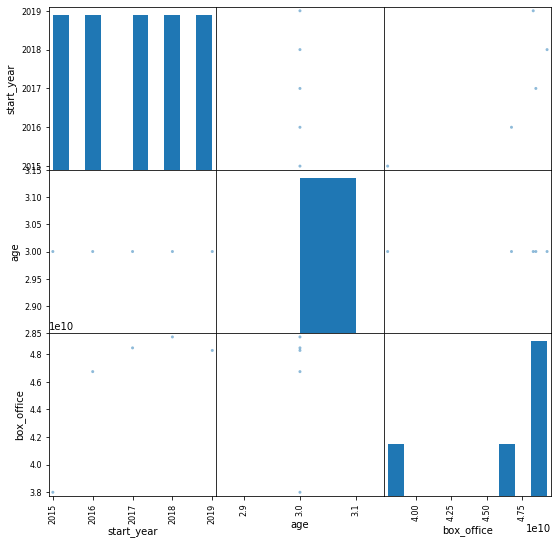

In [110]:
df_year_age_office = df\
    .query('box_office <= up_office' and 'box_office >= low_office' and 'start_year >= 2015') \
    .pivot_table(index='start_year', values=['age', 'box_office'], aggfunc={'age': 'median', 'box_office': 'sum'})\
    .reset_index().sort_values(by='age')
scatter_matrix(df_year_age_office, figsize=(9, 9));

Видим, что в 2017 году был максимум сборов, причем ограничение по возрасту в среднем было 12+ на протяжении всех лет с 2015 по 2019 годы. Возможно это связано с тем, что с годами выпускается всё больше семейных фильмов, то есть для просмотра с 12 лет.

### Исследуем фильмы, которые получили государственную поддержку

Для начала найдем объем суммарной гос. поддержки.

In [111]:
def find_sum_support(row):
    refund = row['refundable_support']
    nonrefund = row['nonrefundable_support']
    
    if refund != refund: # проверка на пропуск
        return np.nan # возврат пропуска в случае пропуска
    else:
        return (refund + nonrefund) # возврат суммарной поддержки

In [112]:
df['film_support'] = df.apply(find_sum_support, axis=1)
df[df['film_support'].notna()]['film_support'].head()

1281    26,500,000.00
1448    26,000,000.00
1498   107,847,945.00
1524    28,000,000.00
1792    25,000,000.00
Name: film_support, dtype: float64

Теперь посмотрим на характеристики этого столбца.

In [113]:
df['film_support'].sum()

18794018847.0

На поддержку кино, с учетом того, что в данных большое количество пропусков, суммарно выделяют более 20 миллиардов. Это должны быть настоящие шедевры с учетом такого финансирования.
Посмотрим на те фильмы из финансируемых, которые окупаются, то есть сборы с проката должны быть больше или равны бюджету.

In [114]:
df.query('film_support > 0 and box_office >= budget').describe()

,pu_number,refundable_support,nonrefundable_support,budget,box_office,start_year,share_of_budget,age,film_support
count,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00,66.00
mean,"111,372,139.61","21,348,484.85","64,252,461.39","177,143,477.11","480,381,333.34","2,016.92",0.49,2.06,"85,600,946.24"
std,"984,946.36","28,824,931.74","80,082,816.09","147,367,534.04","591,553,223.45",1.51,0.16,0.86,"87,532,208.28"
min,"111,000,116.00",0.00,0.00,"31,305,313.00","62,260,863.65","2,014.00",0.13,0.00,"20,000,000.00"
25%,"111,003,668.00",0.00,"28,132,500.00","80,000,000.00","126,223,842.03","2,016.00",0.36,1.00,"31,250,000.00"
50%,"111,008,368.50","6,500,000.00","35,000,000.00","135,275,751.50","308,026,063.47","2,017.00",0.50,2.00,"50,061,957.50"
75%,"111,018,365.75","40,000,000.00","54,934,291.25","218,339,440.00","533,516,503.75","2,018.00",0.64,3.00,"100,000,000.00"
max,"114,008,818.00","115,000,000.00","400,000,000.00","635,283,867.00","3,073,568,690.79","2,019.00",0.70,4.00,"442,104,482.00"


Видим, что из 330 фильмов с данными всего 79 окупаются. При этом мы заполняли пропуски в бюджете на сумму гос. поддержки исходя из того, что бюджет не может быть равен нулю, если есть гос. поддержка. В реальности там вероятнее всего должны быть цифры, превышающие сумму гос. поддержки и поэтому количество окупившихся фильмов может быть еще меньше.

Добавим столбец, который будет говорить нам, что фильм с поддержкой или нет.

In [115]:
df['is_support'] = df['film_support'].apply(lambda sup: 'С поддержкой' if (sup != sup) else 'Без поддержки')

In [116]:
# проверка
df['is_support'].unique()

array(['С поддержкой', 'Без поддержки'], dtype=object)

In [117]:
df_rate_sup = df.groupby('ratings')['is_support'].count()

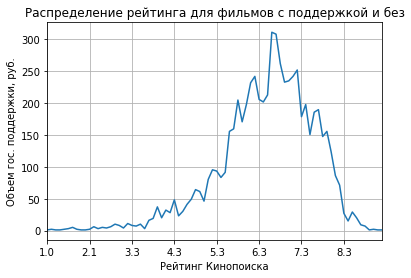

In [118]:
ax = df_rate_sup.plot(
    grid=True
);

ax.set_title('Распределение рейтинга для фильмов с поддержкой и без');
ax.set_xlabel('Рейтинг Кинопоиска');
ax.set_ylabel('Объем гос. поддержки, руб.');

Посмотрим на распределение рейтинга фильмов с и без поддержки

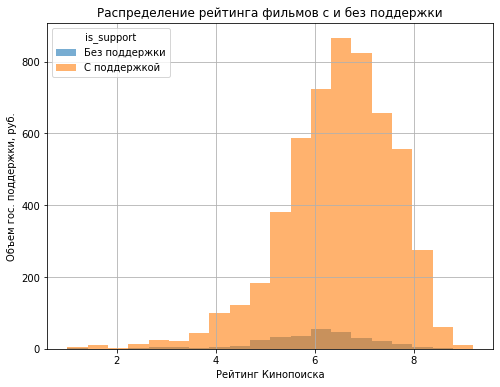

In [119]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
ax = (df\
         .pivot_table(index='title', columns='is_support')\
         .plot.hist(y='ratings', figsize=(8, 6), grid=True, bins=20, alpha=0.6)
)


ax.set_title('Распределение рейтинга фильмов с и без поддержки');
ax.set_xlabel('Рейтинг Кинопоиска');
ax.set_ylabel('Объем гос. поддержки, руб.');

Видим, что фильмы с поддержкой занимают позиции выше среднего рейтинга - от 5.6 до 7.8. Фильмы без поддержки немного ниже рейтингом, ближе к середине.

### Общий вывод

В результате работы над проектом мы увидели, что популярными фильмами с годами становятся семейные, ограничение по возрасту которых - 12+. Эта тенденция наблюдается с 2015 года и пик сборов с проката был в 2017 году. Возможно, это связано с выходом продолжений популярных фильмов из серии Marvel: Тор, Стражи Галактики, Человек-Паук. В этом же году "стрельнул" отличный российский фильм "Движение вверх". Такой комбинации, скорее всего, больше не встречалось в последующие годы.

Однако картина не является полной, так как в данных присутствует огромное количество пропусков. Для более глубоко анализа нужна дополнительная информация или более подробная по пропускам.